
# [1] NLP Basics


## 1.1) Strings and encodings 

- Unicode and ASCII. Limitations/Benefits of different encodings
- Formatting strings
- Basic methods for strings
- Working with dates: **`datetime`** module


## 1.2)  Regular expressions

- Working with regular expressions
- Exercise


## 1.3) From strings to lists of words

- Python methods for strings
- Splitting sequences: **`nltk`** vs **`split`**


## 1.4) Features for words

- From words to features.
   - Dictionary based approach
   - Hash based approach (investigate)

In [63]:
import sys
import string


## 1.1) Strings and encodings 

- 1.1.1) Unicode and ASCII. Limitations/Benefits of different encodings
- 1.1.2) Formatting strings
- 1.1.3) Basic methods for strings
- 1.1.4) Working with dates



### 1.1.1) Unicode and ASCII. Limitations/Benefits of different encodings

In [64]:
'This is a string'

'This is a string'

In [65]:
"This is a string"

'This is a string'

In [66]:
'''This is also a longer string'''

'This is also a longer string'

In [5]:
a = """The man who said "I'll never accept your resignation" ended up firing me because I didn't know enough NLP. """
print(a)

The man who said "I'll never accept your resignation" ended up firing me because I didn't know enough NLP. 


In [6]:
type("This is a string")

str

In [7]:
type(b"This is a string")

bytes

In [8]:
type(u"This is a string")

str

#### Ascii vs utf-8

There are many ways to encode strings.

At the end of the day all symbols are simply mapped to integers in binary. The more symbols we have the more bits we need to encode them. 

Historically since computer science began in English countries, ASCII was the standard. 

- ASCII didn't contain any accents.
- Unicode
   - UTF-8 contains ASCCII.

There has to be a big memory constraint for you to want to use ASCII. 

In [9]:
a = u"This ia a house."
b = b"This is a house."

In [10]:
len(a), len(b)

(16, 16)

In [11]:
sys.getsizeof(a)

65

In [12]:
sys.getsizeof(b)

49

#### Why not ASCII?? 
#### Languages have accents, and "rare" (non english) symbols: ñ, è, é, ä, â, 

In [13]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [14]:
string.whitespace

' \t\n\r\x0b\x0c'

In [15]:
u'Españoles, Franco ha muerto'

'Españoles, Franco ha muerto'

In [16]:
# Can't do it!!
b'Españoles, Franco ha muerto' 

SyntaxError: bytes can only contain ASCII literal characters. (<ipython-input-16-6a197a9b2a09>, line 2)

In [17]:
a = "Demasiados $".encode("ascii")

In [18]:
a = "Demasiados €".encode("ascii")

UnicodeEncodeError: 'ascii' codec can't encode character '\u20ac' in position 11: ordinal not in range(128)

In [67]:
a = "Castaña!".encode("ascii")

UnicodeEncodeError: 'ascii' codec can't encode character '\xf1' in position 5: ordinal not in range(128)

In [ ]:
a8  = "Café".encode("utf8")
a16 = "Café".encode("utf16")
a32 = "Café".encode("utf32")

In [19]:
print(a8)
print(a16)
print(a32)

NameError: name 'a8' is not defined

In [20]:
sys.getsizeof(a8), sys.getsizeof(a16), sys.getsizeof(a32)

NameError: name 'a8' is not defined

In [21]:
print(b'Caf\xc3\xa9')

b'Caf\xc3\xa9'


#### Unicode data 

Some  important things to consider:

- When reading data from files, expect bytes and decode then with **`b.decode('utf-8')`**.

- When writting data back to a file, encode it with **`b.encode('utf-8')`**.

- Avoid using **`str()`** or  **`bytes()`** without an encoding to convert between types.

In [22]:
f = open("../data/spanish_line.txt")

In [23]:
a = f.readline()

In [24]:
a

'El hombre inglés de la montaña no puede leer esto ya que usa un encoding de los 70.\n'

### 1.1.2) Formatting strings

We can format strings using the `x.format` method. This method allow us to introduce information inside the string x. We write placeholders `{}` inside the string `x` in the positions where we want to put certain information.

Let us see some examples

In [25]:
names = ['David', 'Jaquim', 'Michael']
ages = [19, 30, 50]

for name,age in zip(names,ages):
    print('name: {}\t age: {}'.format(name,age))

name: David	 age: 19
name: Jaquim	 age: 30
name: Michael	 age: 50


In [26]:
# Write number as percentage
'Model accuracy: {}%'.format(97)

'Model accuracy: 97%'

#### Placeholders and digit formatting

We can speficy the number of digits used when formatting a number, or the maximum number of decimals.

In [27]:
print('big number {} hard to read'.format(10**10))

big number 10000000000 hard to read


In [28]:
print('big number {:,} better with commas'.format(10**10))

big number 10,000,000,000 better with commas


In [29]:
print('big number {:,.3f} also with decimal places'.format(10**10))

big number 10,000,000,000.000 also with decimal places


In [30]:
for i in range(5,15):
    print('number {:02}'.format(i))

number 05
number 06
number 07
number 08
number 09
number 10
number 11
number 12
number 13
number 14


In [31]:
# Decide the number of decimals
for i in range(5,15):
    print('number 2 dedimals {:.2f}'.format(i/3.),end="\t")
    print('number 3 decimals {:.3f}'.format(i/3.))

number 2 dedimals 1.67	number 3 decimals 1.667
number 2 dedimals 2.00	number 3 decimals 2.000
number 2 dedimals 2.33	number 3 decimals 2.333
number 2 dedimals 2.67	number 3 decimals 2.667
number 2 dedimals 3.00	number 3 decimals 3.000
number 2 dedimals 3.33	number 3 decimals 3.333
number 2 dedimals 3.67	number 3 decimals 3.667
number 2 dedimals 4.00	number 3 decimals 4.000
number 2 dedimals 4.33	number 3 decimals 4.333
number 2 dedimals 4.67	number 3 decimals 4.667


In [32]:
# Separate numbers with comma
'{:,}'.format(1234567890)

'1,234,567,890'

#### Placeholders with integer values 
We can also use placeholders with integers inside, this can be usefull in a variety of situations. For example, if we want to print a repetead value inside a string we don't need to pass it to the format method several times.

In [33]:
# We don't need to do this
for name,age in zip(names,ages):
    print('name: {}\t name again: {} \t age: {}'.format(name, name, age))

name: David	 name again: David 	 age: 19
name: Jaquim	 name again: Jaquim 	 age: 30
name: Michael	 name again: Michael 	 age: 50


In [34]:
# We can simply use placeholders with integers inside to refer
# to the potition of the input of the format method.
for name,age in zip(names,ages):
    print('name: {0}\t name again: {0} \t age: {1}'.format(name,age))

name: David	 name again: David 	 age: 19
name: Jaquim	 name again: Jaquim 	 age: 30
name: Michael	 name again: Michael 	 age: 50


#### Placeholders with keyword arguments

We can also use keyword arguments inside the format method. By doing so we don't need to take into account the order at which the inputs of `forward` are sent.


In [35]:
for n,a in zip(names,ages):
    print('name: {name}\t \t age: {age}'.format(age=a, name=n))

name: David	 	 age: 19
name: Jaquim	 	 age: 30
name: Michael	 	 age: 50


In [36]:
'{0}, {1}, {2}'.format('a', 'b', 'c')

'a, b, c'

In [37]:
'{2}, {1}, {0}'.format('a', 'b', 'c')

'c, b, a'

In [38]:
'Coordinates: {latitude}, {longitude}'.format(latitude='37.24N', longitude='-115.81W')

'Coordinates: 37.24N, -115.81W'

#### Placeholders with dictionary inputs

We can pass dictionaries in the `format` method and use the keys of the dictionaries inside the placeholders.

In [39]:
names = ['David', 'Jaquim', 'Michael']
ages = [19, 30, 50]
d = []s

for n,a in zip(names,ages):
    d.append({'name':n, 'age':a})

In [40]:
for d_k in d:
    print('name: {name}\t \t age: {age}'.format(**d_k))

name: David	 	 age: 19
name: Jaquim	 	 age: 30
name: Michael	 	 age: 50


In [41]:
coord = {'latitude': '37.24N', 'longitude': '-115.81W'}
'Coordinates: {latitude}, {longitude}'.format(**coord)

'Coordinates: 37.24N, -115.81W'

#### Access object atributes

In [42]:
c = 3-5j

In [43]:
' {0} is formed from the real part {0.real} and the imaginary part {0.imag}.'.format(c)

' (3-5j) is formed from the real part 3.0 and the imaginary part -5.0.'

In [68]:
class Point(object):
    def __init__(self, x, y):
         self.x, self.y = x, y
    def __str__(self):
         return 'Point({self.x}, {self.y})'.format(self=self)

In [69]:
aux = Point(4,2)

In [70]:
aux.x, aux.y

(4, 2)

In [71]:
print(aux)

Point(4, 2)


#### Controlling begining and end of strings: Placeholders for tables


We can print strings in a table like format where we can control spaces with a very nice trick. We can simply use `{k:len_k}` to specify the starting position and the length of the column.

```
Index       Colum1       Column2
value_c0_1  value_c1_2   value_c2_2
value_c0_1  value_c1_2   value_c2_2
```

In [1]:
len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Index","Column2","Column1"))
#print(("-"*(len_bin-1)+" ")*3)
for c0_k,c1_k,c2_k in zip(c0,c1,c2):
    print(col_formater.format(c0_k,c1_k,c2_k))

Index               Column2             Column1             


NameError: name 'c0' is not defined

### 1.1.3) Basic methods for strings

- `str.find(s,w)`
   - returns the opsition of the first occurance of `w` in `s`


- `str.replace(x, s1, s2)`
   - Replaces each `s1` in `x` with by `s2`


- `str.split(x,sep=None)`
  - If `sep` is not specified or is `None`, any
    whitespace string is a separator and empty strings are
    removed from the result.


- `str.upper(x)`
  - Returns the string `x` with all characters uppercase.


- `str.lower(x)`
  - Returns the string `x` with all characters in lowercase.


- `str.endswith(x,s)`
    - Returns True if `x` ends with substring `s`
    

- `str.startswith(x,s)`
    - Returns True if `x` ends with substring `s`
  
#### issomething methods
  
- `str.isupper(x)`
  - Returns True if  `x` all its characters are uppercased.
  
  
- `str.isdigit(x)`
  - Returns True if  `x` all its characters are digits.
  
  
- `str.isalpha(x)`
    - Return True if all characters in x are alphabetic
    
    
- `str.isalnum(x)`
    - Return True if all characters in x are alphabetic



In [48]:
str.find

<method 'find' of 'str' objects>

In [49]:
s = "Rescue divers will have to navigate flooded passages, with some openings as small as 3 feet\
     wide and 2 feet tall, to rescue 12 boys and their soccer coach who have been\
     trapped for more than two weeks in a cave in Thailand. "

w = "trapped"

s[str.find(s,w):]

'trapped for more than two weeks in a cave in Thailand. '

In [50]:
str.replace("The house", "house", "cat"), str.replace("Cats have six lives", "i", "e")

('The cat', 'Cats have sex leves')

In [51]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [52]:
# Return a list of strings splitted by the sep character
str.split("house is big", sep="o")

['h', 'use is big']

In [53]:
# Return a list of strings splitted by the sep character
str.split("house is big")

['house', 'is', 'big']

In [72]:
# return string with first character uppercased
str.capitalize("house")

'House'

In [55]:
# Return the string with lowered characters
str.lower("The CEO of Apple resigned.")

'the ceo of apple resigned.'

In [56]:
# number of non overlappeing occurencers of the query string in the input string
str.count("this house is bigger than this car","this")

2

In [57]:
# Check if input ends with a substring
str.endswith("Encoding","ing")

True

In [58]:
# Check if input starts with substring
str.startswith("Encoding","Enc"), str.startswith("Encoding","enc")

(True, False)

#### issomething methods

In [59]:
# verify if al characters are capitals
'A'.isupper(),'Abc'.isupper(), 'a'.isupper()

(True, False, False)

In [60]:
# verify if all characters are digits
'a'.isdigit(), '7eleven'.isdigit(), '723'.isdigit()

(False, False, True)

In [61]:
# Check if all characters alphabetic
str.isalpha("7eleven"), str.isalpha("the house"), str.isalpha("thehouse"),str.isalpha("the1"), str.isalpha("castaña")

(False, False, True, False, True)

In [62]:
# Check if all characters alphabetic OR numeric
str.isalnum("7eleven")

True


### 1.1.4) Working with dates

In [63]:
import datetime
my_date = datetime.datetime(2019,10,5,10)

In [64]:
my_date

datetime.datetime(2019, 10, 5, 10, 0)

## 1.2)  Regular expressions


- Working with regular expressions
- Exercise

#### re.compile

- Generate a regular expression using **`p = re.compile(r'our_regular_expression')`**.
    - `p` will be a  `SRE_Pattern` object that we can apply to any string.


- **`p.findall(s)`** returns a list containing all substrings within `s` that safisfy our regular expression.


- **`p.finditer(s)`** returns a generator. Each element of the generator is a `SRE_Match`which contains 
    - **`span(x,y)`** indicating that the match starts at position `x` and ends in position `y` (of s).
    - **`match='...'`** indicating the string that satisfies the regular expression.



- **`p.sub(r'XXX', s)`** change all patterns by `XXX`




#### Special characters in regular expression

- **`.`** Matches any character except new line.


- **`\d`** Matches any digit (0-9). Equivalent to `[0-9]`.


- **`\D`** Matches any NON digit. Equivalent to `[^0-9]`.


- **`\w`** Matches any "word character". Equivalent to `[a-zA-Z0-9_]`


- **`\W`** Matches any NON alphanumeric character. Equivalent to `[^a-zA-Z0-9_]`


- **`\s`** Matches any whitespace (space, tab, newline). Equivalent to `[\t\n\r\f\v]` 


- **`\S`** Matches any NON whitespace (space, tab, newline). Equivalent to `[^ \t\n\r\f\v]` 

#### Anchers

- **`\b`** Matches any word boundary.


- **`\b`** Matches any NON word boundary.


- **`^`** Matches beginning of a string


- **`[^a-e]`** negates the character set. That is matches any character outside `a-e`.


- **`$`** Matches a position that is end of a string.



#### Working with character sets

- **`[]`** allows us to specify sets of symbols.


- **`[ab3-]`** matches any character `a`  or `b`or `3` or `-`.


- **`[a-g]`** matches any character `a`  to `g` such as `b`,`c`,`d`,...,`g`


- **`[A-G]`** matches any character `A`  to `G` such as `B`,`C`,`D`,...,`G`


- **`[a-zA-G]`** matches any lowerchase character and any uppercase character from `A`  to `G`.


- **`[d1-d2]`** matches any digit between `d1` and `d2`. For example `[0-5]` matches `0`,`1`,`2`,`3`,`4`,`5`


For example:

- `r'[abcd][abcd][a-z]'` matches any 3 character word that starts which contains a,b,c,d in the first 2 letters such as `cat`.


#### Quantifiers 

Quantifiers are operators that are applied to the preceding symbol.


- **`*`** previous symbol appears 0 or more matches.


- **`+`** previous symbol appears 1 or more matches.


- **`?`** previous symbol appears at most one (0 or 1).


- **`{k}`** previous symbol repeated k exact matches.


- **`{min,max}`** previous symbol appears  any number between min and max. For example `{2,8}` would be between 2 and 8 matches


For example:

- `r'a.*'` the `*` refers to  `.` making this expression get trigerred when `a` is followed by any character.


- `r'\d{4}'` the `{4}` referes to `\d` making this regular expression get triggered with 4 consecutive digits.

#### Groups

Groups are created between parenthesis

- **`(abc)?`**  is the group `abc` which cap appear or not.



In [65]:
import re
a = '\tSomething'   # Standard string
b = r'\tSomething'  # Raw string
print(a)
print(b)

	Something
\tSomething


In [66]:
aux =  "The girl who loved the black cat ended up with a catwomen costume."
p = re.compile(r'[abcd][abcd][a-z]')
p.findall(aux)

['ack', 'cat', 'cat']

In [67]:
p = re.compile(r'cat')
p.findall(aux)

['cat', 'cat']

In [68]:
p = re.compile(r'cat\s')
p.findall(aux)

['cat ']

In [69]:
phones = "My phone number is 649070976, please don't call me, call 999."
p = re.compile(r'\d\d\d\d\d\d\d\d\d')
p.findall(phones)

['649070976']

In [70]:
p = re.compile(r'My.')
p.findall(phones)

['My ']

In [71]:
example = "The phone 643*234*1312 will be picked up by the regular expression but we might"+\
          "want only numbers separated by . or _ such as 645-312-3132 or 654.425.2214."
    
p = re.compile(r'\d\d\d.\d\d\d.\d\d\d\d')
p.findall(example)

['643*234*1312', '645-312-3132', '654.425.2214']

In [72]:
p = re.compile(r'\d\d\d[-.]\d\d\d[-.]\d\d\d\d')
p.findall(example)

['645-312-3132', '654.425.2214']

In [73]:
example = "Notice that the character set tries to match one of the characters within for example\
        649--342-2332 will not be picked by our regular expression neither 649---342-2333"
p.findall(example)    

[]

In [74]:
p = re.compile(r'\d\d\d[-.][-.]\d\d\d[-.]\d\d\d\d')
p.findall(example)

['649--342-2332']

In [75]:
p = re.compile(r'\d\d\d[-.]*\d\d\d[-.]\d\d\d\d')
p.findall(example)

['649--342-2332', '649---342-2333']

In [76]:
p = re.compile(r'\d{3}[-.]{0,3}\d{3}[.-]\d{4}')
p.findall(example)

['649--342-2332', '649---342-2333']

#### Substitutions

In [77]:
urls = '''
https://www.ub.edu is the web of the university
https://youtube.com is from google !
https://www.nasa.gov is where the geeks work
'''

In [78]:
pattern = re.compile(r'https?://[\w]\.?\w+\.\w+')
pattern.findall(urls)

['https://www.ub', 'https://youtube.com', 'https://www.nasa']

In [79]:
pattern = re.compile(r'https?://(www\.)?\w+(\.\w+)')

for match in pattern.finditer(urls):
    print(match)

print("")
for match in pattern.finditer(urls):
    print('group 1:', match.group(1))
    
print("")
for match in pattern.finditer(urls):
    print('group 2:', match.group(2))
    
#print("")
#for match in pattern.finditer(urls):
#    print('group 3:', match.group(3))

<_sre.SRE_Match object; span=(1, 19), match='https://www.ub.edu'>
<_sre.SRE_Match object; span=(49, 68), match='https://youtube.com'>
<_sre.SRE_Match object; span=(86, 106), match='https://www.nasa.gov'>

group 1: www.
group 1: None
group 1: www.

group 2: .edu
group 2: .com
group 2: .gov


In [80]:
pattern.findall(urls)

[('www.', '.edu'), ('', '.com'), ('www.', '.gov')]

In [81]:
pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)')

for match in pattern.finditer(urls):
    print(match)
    
print("")
for match in pattern.finditer(urls):
    print('group 1:', match.group(1))
    
print("")
for match in pattern.finditer(urls):
    print('group 2:', match.group(2))
    
print("")
for match in pattern.finditer(urls):
    print('group 3:', match.group(3))

<_sre.SRE_Match object; span=(1, 19), match='https://www.ub.edu'>
<_sre.SRE_Match object; span=(49, 68), match='https://youtube.com'>
<_sre.SRE_Match object; span=(86, 106), match='https://www.nasa.gov'>

group 1: www.
group 1: None
group 1: www.

group 2: ub
group 2: youtube
group 2: nasa

group 3: .edu
group 3: .com
group 3: .gov


In [82]:
pattern.findall(urls)

[('www.', 'ub', '.edu'), ('', 'youtube', '.com'), ('www.', 'nasa', '.gov')]

#### Why groups? We can use them to change parts of string matches

In [83]:
print(urls)


https://www.ub.edu is the web of the university
https://youtube.com is from google !
https://www.nasa.gov is where the geeks work



In [84]:
urls2   = pattern.sub(r'***hiddenurl***', urls)
print(urls2)


***hiddenurl*** is the web of the university
***hiddenurl*** is from google !
***hiddenurl*** is where the geeks work



In [85]:
pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)')
urls2   = pattern.sub(r'\2\3', urls)
print(urls2)


ub.edu is the web of the university
youtube.com is from google !
nasa.gov is where the geeks work



In [86]:
urls2   = pattern.sub(r'\3', urls)
print(urls2)


.edu is the web of the university
.com is from google !
.gov is where the geeks work



#### Exercise: Find all telephone numbers that start with 900 or 800

In [74]:
import re

In [75]:
p = re.compile(r'[89]00.\d\d\d.\d\d\d\d')
with open("../data/people_data.txt") as f:
    info = f.read()
    matches = p.findall(info)
    print(matches)

['800-555-5669', '900-555-9340', '800-555-6771', '900-555-3205', '800-555-6089', '800-555-7100', '900-555-5118', '900-555-5428', '800-555-8810', '900-555-9598', '800-555-2420', '900-555-3567', '800-555-3216', '900-555-7755', '800-555-1372', '900-555-6426']


#### Exercise: Find all telephone numbers that DO NOT start with 8 or 9

In [88]:
p = re.compile(r'[0-7]\d\d.\d\d\d.\d\d\d\d')
with open("../data/people_data.txt") as f:
    info = f.read()
    matches = p.findall(info)
    print(matches)

['615-555-7164', '560-555-5153', '714-555-7405', '783-555-4799', '516-555-4615', '127-555-1867', '608-555-4938', '568-555-6051', '292-555-1875', '614-555-1166', '530-555-2676', '470-555-2750', '777-555-8378', '196-555-5674', '203-555-3475', '195-555-2405', '321-555-9053', '133-555-1711', '760-555-7147', '391-555-6621', '609-555-7908', '149-555-7657', '130-555-9709', '143-555-9295', '574-555-3194', '496-555-7533', '210-555-3757', '669-555-7159', '152-555-7417', '217-555-7123', '786-555-6544', '780-555-2574', '372-555-9809', '670-555-3005', '509-555-5997', '721-555-5632', '147-555-6830', '582-555-3426', '400-555-1706', '525-555-1793', '317-555-6700', '746-555-4094', '711-555-4427', '355-555-1872', '691-555-5773', '332-555-5441', '379-555-3685', '127-555-9682', '789-555-7032', '783-555-5135', '315-555-6507', '481-555-5835', '365-555-8287', '681-555-2460', '274-555-9800', '300-555-7821', '133-555-3889', '705-555-6863', '215-555-9449', '623-555-3006', '192-555-4977', '178-555-4899']


#### Exercise: Find all mister references in the string

In [89]:
s = """Mr. Robbinson and Mr David bought the company from Mr  JJ yet and Mr dani"""
p = re.compile(r'Mr\.')
p.findall(s)

['Mr.']

In [90]:
## Why is this not pikking "Mr David" ?
## Well because I am imposing (M,r,[. ],\s,[A-Z])
## And "Mr D" breaks this at the 4th character which is D and should be \s
p = re.compile(r'Mr[. ]\s[A-Z]')
print(p.findall(s))

## If we remove \s now  only 'Mr David' follows (M,r,[. ],[A-Z])
p = re.compile(r'Mr[. ][A-Z]')
print(p.findall(s))

## If we add a symbol ? after \s then we make optional the empty space after [. ].
## Therefore any string matching (M,r,[. ],\s,[A-Z]) or (M,r,[. ],[A-Z])
p = re.compile(r'Mr[. ]?\s[A-Z]')
print(p.findall(s))

['Mr. R', 'Mr  J']
['Mr D']
['Mr. R', 'Mr D', 'Mr  J']


In [91]:
## Be carefull making expressions too general
## This one can have any number of dots or empty spaces
p = re.compile(r'Mr[. ]*[A-Z]')
print(p.findall(s))

## This one can have any number of times ANY character
p = re.compile(r'Mr.*[A-Z]')
print(p.findall(s))

## This one can have  or a dot or an empty space 0 or more times
p = re.compile(r'Mr[. ]*[A-Z]')
print(p.findall(s))

## If we want the whole name then we need to allow the regular expression to get any 
## character after the Capital letter any number of times. Since `dani` does not start
## in capital it is not matched
p = re.compile(r'Mr[. ]*[A-Z]\w*')
print(p.findall(s))

## If we also want dani ... 
p = re.compile(r'Mr[. ]*\w*')
print(p.findall(s))

['Mr. R', 'Mr D', 'Mr  J']
['Mr. Robbinson and Mr David bought the company from Mr  JJ yet and M']
['Mr. R', 'Mr D', 'Mr  J']
['Mr. Robbinson', 'Mr David', 'Mr  JJ']
['Mr. Robbinson', 'Mr David', 'Mr  JJ', 'Mr dani']


In [92]:
p = re.compile(r'Mr.?\s\w*')
print(p.findall(s))

['Mr. Robbinson', 'Mr David', 'Mr  JJ', 'Mr dani']


#### Exercise: Find all email adresses

In [93]:
s = """Hei could you send the same information to james@gmail.com and andrea? ,
       I think andrea's mail was andrea_marina88@hotmail.com but it could be andrea.marina88@mat.ub.edu"""

In [94]:
p = re.compile(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
p.findall(s)

['james@gmail.com',
 'andrea_marina88@hotmail.com',
 'andrea.marina88@mat.ub.edu']

In [95]:
p = re.compile(r'[.\w]+@[\w\.]+')
p.findall(s)

['james@gmail.com',
 'andrea_marina88@hotmail.com',
 'andrea.marina88@mat.ub.edu']

#### Exercise

In [96]:
home = r"We found the area of Turo Parc this beautiful ground floor of 220 m2 plus a terrace of 30 m2 the floor consists\
     of a large salo dining room overlooking the Turo Prac with large windows, kitchen with natural light with glass\
     to see the park in a back are the rooms where there are two double rooms one single with access to the terrace \
     and a suite room with bathroom, bathroom with shower, with the floor is included a parking space not located in\
     the same building. It is a flat in one of the most luxurious and residential areas of Barcelona. surrounded by\
     shops cinemas supermarkets shopping center Diagonal Island, market Galvany gyms. with public transport of \
     railways and buses"

In [97]:
pattern = re.compile(r'area')
matches = pattern.findall(home)
print(matches)

['area', 'area']


In [98]:
matches = pattern.finditer(home)
matches_list = list(matches)
matches_list

[<_sre.SRE_Match object; span=(13, 17), match='area'>,
 <_sre.SRE_Match object; span=(541, 545), match='area'>]

In [99]:
matches = pattern.finditer(home)
for m in matches:
    print(m)

<_sre.SRE_Match object; span=(13, 17), match='area'>
<_sre.SRE_Match object; span=(541, 545), match='area'>


In [100]:
m1 = matches_list[0].span()
s[m1[0]:m1[1]]

' sen'

## 1.3) From strings to lists of words


- **`str.split(" ")`**: Is a bad approach for general text.


- **`nltk.wordpunct_tokenize`**: Good string tokenizer that takes into account commas, empty spaces etc...




In [101]:
import nltk
#nltk.download()
#nltk.download('punkt')

In [102]:
s = "the man, who could not stop looking at the coffe shop,   decided to enter \n and ask a latte."

In [103]:
print(nltk.word_tokenize(s))
print(s.split(" "))

['the', 'man', ',', 'who', 'could', 'not', 'stop', 'looking', 'at', 'the', 'coffe', 'shop', ',', 'decided', 'to', 'enter', 'and', 'ask', 'a', 'latte', '.']
['the', 'man,', 'who', 'could', 'not', 'stop', 'looking', 'at', 'the', 'coffe', 'shop,', '', '', 'decided', 'to', 'enter', '\n', 'and', 'ask', 'a', 'latte.']


In [104]:
nltk.word_tokenize("I'll go to the coffe shop.")

['I', "'ll", 'go', 'to', 'the', 'coffe', 'shop', '.']

In [105]:
nltk.word_tokenize("I'lla go to the coffe shop.")

["I'lla", 'go', 'to', 'the', 'coffe', 'shop', '.']

#### Tokenizing in catalan/spanish...

In [106]:
toktok = nltk.ToktokTokenizer()

In [107]:
nltk.word_tokenize("L'Amador té un gos molt pesat.")

["L'Amador", 'té', 'un', 'gos', 'molt', 'pesat', '.']

In [108]:
toktok.tokenize("L'Amador té un gos molt pesat.")

['L', "'", 'Amador', 'té', 'un', 'gos', 'molt', 'pesat', '.']

In [109]:
toktok.tokenize("¿Dónde estoy? ¿Puede alguien ayudarme ?")

['¿', 'Dónde', 'estoy', '?', '¿', 'Puede', 'alguien', 'ayudarme', '?']


## 1.4) Features for words

- From words to features.
   - Dictionary based approach
   - Hash based approach
   

- Tokenize a string
- Encode each token as a one hot vector
- Add all one hot vectors and generate a single sparse vector encoding

In [110]:
import nltk
import sklearn
from sklearn import datasets
X = sklearn.datasets.fetch_20newsgroups()

In [111]:
X["description"]

'the 20 newsgroups by date dataset'

In [112]:
print(X["data"][0]),
print(X["target"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7


In [113]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X["data"], 
                                                                            X["target"])

In [114]:
from tqdm import tqdm

In [115]:
%%time
vocabulary = {}
i = 0
for x in tqdm(X["data"]):
    words = nltk.word_tokenize(x)
    for w in words:
        w = w.lower()
        if w not in vocabulary:
            vocabulary[w] = i
            i = i+1

100%|██████████| 11314/11314 [00:31<00:00, 364.29it/s]

CPU times: user 30.9 s, sys: 240 ms, total: 31.1 s
Wall time: 31.1 s


In [116]:
len(vocabulary)

185694

####  Doing this automatically

In [139]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [140]:
len(count_vectorizer.vocabulary_)

112481

In [141]:
X_train_encoded = count_vectorizer.transform(X_train)
X_test_encoded = count_vectorizer.transform(X_test)

In [142]:
X_train_encoded

<8485x112481 sparse matrix of type '<class 'numpy.int64'>'
	with 1347215 stored elements in Compressed Sparse Row format>

In [143]:
type(X_train_encoded[0])

scipy.sparse.csr.csr_matrix

In [144]:
X_train_encoded[0].nonzero()[1]

array([   109,   3095,   3777,   5025,   5209,   6426,   6743,   6858,
         7427,   9935,  11147,  13562,  16822,  17798,  22104,  22759,
        22763,  22792,  22957,  23297,  23416,  23485,  24071,  24167,
        24375,  24680,  27077,  27379,  28630,  28640,  30127,  32017,
        33702,  33704,  34303,  36274,  36363,  38246,  38981,  40014,
        40395,  40405,  40709,  41222,  41225,  41227,  42950,  43081,
        45039,  45063,  47785,  48024,  48649,  50246,  50847,  51028,
        51043,  51344,  52224,  52576,  53092,  53725,  54172,  54830,
        56305,  56605,  57018,  58098,  58259,  58749,  58954,  62870,
        64668,  65256,  65364,  65517,  67656,  67733,  68800,  69440,
        70463,  75422,  75427,  75517,  75709,  76105,  76251,  76252,
        76573,  76958,  76990,  77451,  77616,  77751,  77861,  79451,
        80192,  82095,  82944,  83035,  86088,  86393,  87476,  87477,
        88769,  91021,  91656,  93064,  93856,  94066,  95407,  96042,
      

In [145]:
m = sklearn.linear_model.LogisticRegression(C=0.1)
m.fit(X_train_encoded, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
m.score(X_train_encoded, y_train), m.score(X_test_encoded, y_test)

(0.9987035945786682, 0.8879462707670555)

In [126]:
import numpy as np
coef = m.coef_[0]
pos_coef_class0 = np.argsort(m.coef_)[0][-10:]
neg_coef_class0 = np.argsort(m.coef_)[0][0:10]
neg_and_pos_coef_inds = np.hstack([neg_coef_class0, pos_coef_class0])
neg_and_pos_coef = coef[ neg_and_pos_coef_inds]

<BarContainer object of 20 artists>

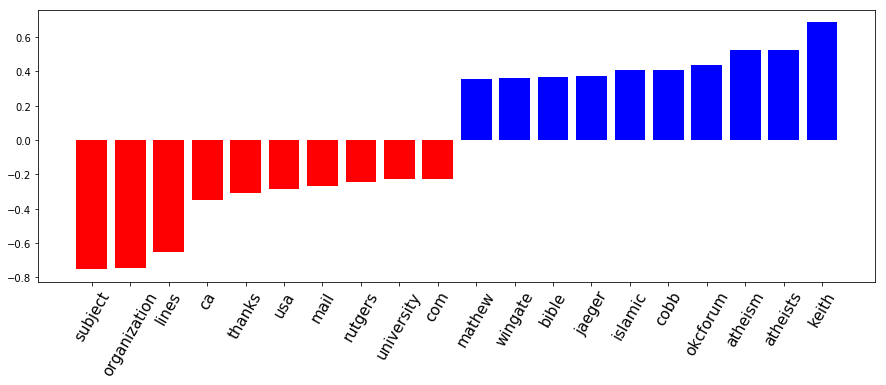

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

feature_names = np.array(count_vectorizer.get_feature_names())
plt.figure(figsize=(15, 5))
plt.xticks(np.arange(20), feature_names[neg_and_pos_coef_inds], rotation=60, size=15)
plt.bar(np.arange(20), neg_and_pos_coef, color=["red" if c < 0 else "blue" for c in neg_and_pos_coef])

In [152]:
#X["target_names"]

## Could we improve with bigram/trigram features?

In [339]:
import sklearn.model_selection
import sklearn.pipeline

In [340]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

In [351]:
model_pipe = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                        ("logisticregression", logistic)],
                                          memory='/Users/david.buchaca/auxiliar_memory_sklearn')

In [352]:
model_pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 2), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('logisticregression',
  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [353]:
grid = {'countvectorizer__ngram_range':[(1,1),(1,2)],
        'logisticregression__C':[0.1,0.2,0.5,0.6,0.9]}

grid_search = sklearn.model_selection.GridSearchCV(estimator=model_pipe, 
                                                   param_grid=grid,
                                                   verbose=1,
                                                   n_jobs=-1)

In [354]:
%%time 
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.5min finished


CPU times: user 2min 12s, sys: 2.24 s, total: 2min 14s
Wall time: 12min 44s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='/Users/david.buchaca/auxiliar_memory_sklearn',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'countvectorizer__ngram_range': [(1, 1), (1, 2)], 'logisticregression__C': [0.1, 0.2, 0.5, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

#### best result

In [355]:
list(grid_search.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_countvectorizer__ngram_range',
 'param_logisticregression__C',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'mean_train_score',
 'std_train_score']

In [356]:
# Notice C = 0.5 and ngran_rage = (1,2)
grid_search.best_estimator_.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 2), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('logisticregression',
  LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [357]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9998821449616971, 0.8904206433368681)

#### Other results

In [358]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_['params'])
results["cv_mean_test_score"] = grid_search.cv_results_['mean_test_score']

In [359]:
results

,countvectorizer__ngram_range,logisticregression__C,cv_mean_test_score
0,"(1, 1)",0.1,0.858692
1,"(1, 1)",0.2,0.860106
2,"(1, 1)",0.5,0.859870
3,"(1, 1)",0.6,0.859635
4,"(1, 1)",0.9,0.859045
5,"(1, 2)",0.1,0.861874
6,"(1, 2)",0.2,0.866470
7,"(1, 2)",0.5,0.867295
8,"(1, 2)",0.6,0.867060
9,"(1, 2)",0.9,0.866824


####  TFIDF


In [360]:
tfidfvectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
logistic2 = sklearn.linear_model.LogisticRegression(C=0.1)
model_pipe2 = sklearn.pipeline.Pipeline([("tfidfvectorizer", tfidfvectorizer),
                                         ("logisticregression", logistic2)],
                                          memory='/Users/david.buchaca/auxiliar_memory_sklearn')

In [362]:
grid = {'tfidfvectorizer__ngram_range':[(1,1),(1,2)],
        'logisticregression__C':[0.1,0.2,0.5,0.6,0.9]}

grid_search2 = sklearn.model_selection.GridSearchCV(estimator=model_pipe2, 
                                                    param_grid=grid,
                                                    verbose=1,
                                                    n_jobs=-1)


In [363]:
%%time 
grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.2min finished


CPU times: user 56.2 s, sys: 1.89 s, total: 58.1 s
Wall time: 4min 5s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='/Users/david.buchaca/auxiliar_memory_sklearn',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)], 'logisticregression__C': [0.1, 0.2, 0.5, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [364]:
import pandas as pd
results2 = pd.DataFrame(grid_search2.cv_results_['params'])
results2["cv_mean_test_score"] = grid_search2.cv_results_['mean_test_score']

In [365]:
results2

,logisticregression__C,tfidfvectorizer__ngram_range,cv_mean_test_score
0,0.1,"(1, 1)",0.743194
1,0.1,"(1, 2)",0.735769
2,0.2,"(1, 1)",0.791043
3,0.2,"(1, 2)",0.788097
4,0.5,"(1, 1)",0.841721
5,0.5,"(1, 2)",0.840896
6,0.6,"(1, 1)",0.847496
7,0.6,"(1, 2)",0.851031
8,0.9,"(1, 1)",0.861638
9,0.9,"(1, 2)",0.865645


Feature vector sizes

In [366]:
grid_search2.best_estimator_.steps[0][1].transform(X_train[0:10]).shape

(10, 972216)

In [367]:
grid_search.best_estimator_.steps[0][1].transform(X_train[0:10]).shape

(10, 972216)

Results

In [368]:
grid_search2.score(X_train, y_train), grid_search2.score(X_test, y_test)

(0.9819681791396582, 0.8826440438317427)

In [369]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.9998821449616971, 0.8904206433368681)